In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
df=pd.read_pickle('data/paths.pkl.xz')

Populating the interactive namespace from numpy and matplotlib


In [2]:

def draw_path(to_draw):
    img=imread("paths0.png")
    imshow(img)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    for t in to_draw.index:
        oo = df_by_obj.loc[t]
        plot(oo.x, oo.y)
  

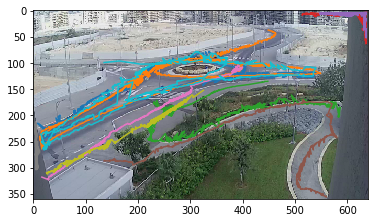

In [3]:

objs = df.groupby(["filename", "obj"]).size().sort_values(ascending=False)
top10 = objs.head(10)
draw_path(top10)

In [4]:
def filter_by_date_time(date,begin,end):
    objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})

    date =pd.to_datetime(date)
    begin_time =date+ pd.to_timedelta(begin)
    end_time =date+pd.to_timedelta(end)

    # print(date,begin_time,end_time)
#     print(objs) 
    min=objs[('time','min')]
    max=objs[('time','max')]
#     print(min.dt.date)
    items=objs[(min.between(begin_time,end_time)) | ((min.where(min<begin_time)&(max.where(max>begin_time))))]
    print(items)
    draw_path(items)


In [ ]:
# filter_by_date_time("2017-08-20","04:00:02","09:03:02")

In [6]:
def filter_by_time(begin,end):
    objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})

    begin_time =pd.to_datetime(begin).time()
    end_time =pd.to_datetime(end).time()

    # print(date,begin_time,end_time)
#     print(objs) 
    min=objs.time['min'].dt.time#objs[('time','min')]
    max=objs.time['max'].dt.time#objs[('time','max')]
    print(min,max)
    items=objs[(min.between(begin_time,end_time)) | ((min<begin_time)&(max>begin_time))]
    print(items)
    draw_path(items)

filename                                  obj
-16\20170820143029_100.h264.txt           22     14:31:09
.h264.txt                                 4      16:51:53
                                          13     10:46:30
0.h264.txt                                39     08:52:55
0003141_100.h264.txt                      6      00:33:52
                                          7      00:33:52
                                          8      00:33:52
                                          9      00:33:52
                                          10     00:33:52
0041952_100.h264.txt                      7      04:24:11
                                          8      04:24:11
                                          9      04:24:11
                                          10     04:24:11
                                          11     04:24:11
                                          12     04:24:11
                                          13     04:24:12
0095531_100.h264.txt      

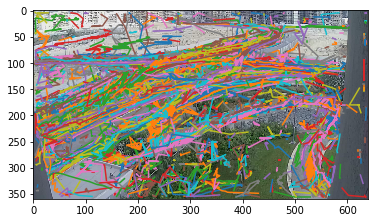

In [7]:
# filter_by_time("04:00:02","09:03:02")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


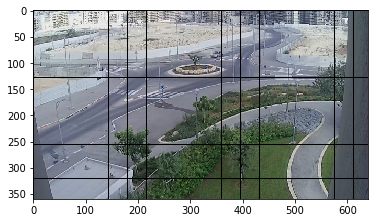

In [26]:
img=imread("paths0.png")

import numpy as np
import matplotlib.pyplot as plt

# plt.figure(figsize=(6,4.5))
# plt.subplots_adjust(top=0.9, bottom=0.1)
grid=img
h,w=img.shape[:2]
dx, dy = w//10,h//10

grid_color = -1
grid[:,::dy] = grid_color
grid[::dx,:] = grid_color


imshow(grid)
show()

